In [34]:
import pandas as pd

# Load the transactions data
file_name= "customer_feedback.csv"
read_file = "/Users/ajaychandraas/Library/CloudStorage/OneDrive-IUInternationalUniversityofAppliedSciences/2nd Sem Subjects/Elective A Project BI/Data/"+file_name 
df = pd.read_csv(read_file)
df.rename(columns={'comment': 'message'}, inplace=True)
df

ticket_id  customer_name                    email  \
0           1  Alice Johnson  alice.johnson@email.com   
1           2    David Smith    david.smith@email.com   
2           3  Sophie Turner  sophie.turner@email.com   
3           4   Chris Harris   chris.harris@email.com   
4           5  Rachel Miller  rachel.miller@email.com   
..        ...            ...                      ...   
94         95     Noah White     noah.white@email.com   
95         96      Ava Smith      ava.smith@email.com   
96         97   Lucas Wilson   lucas.wilson@email.com   
97         98  Sophie Harris  sophie.harris@email.com   
98         99   Ethan Turner   ethan.turner@email.com   

                                              message  
0                   The mattress delivery was delayed  
1   Having trouble understanding the warranty details  
2                                    Ordered a pillow  
3   The customer support team was responsive and a...  
4               Exploring different mattresses online  
..                                                ...  
94  Product information on the website is outrageo...  
95  I'm seriously concerned about the durability o...  
96  I experienced an unacceptably long delay in re...  
97  I'm intensely interested in sleep-related cont...  
98  Product descriptions are alarmingly unclear, a...  

[99 rows x 4 columns]

In [35]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    stop_words = set(stopwords.words('english'))
    words = word_tokenize(text)
    filtered_words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply preprocessing to the "comment" column
df['processed_message'] = df['message'].apply(preprocess_text)

# Display the updated DataFrame
print(df[['ticket_id', 'customer_name', 'email', 'processed_message']].head())


   ticket_id  customer_name                    email  \
0          1  Alice Johnson  alice.johnson@email.com   
1          2    David Smith    david.smith@email.com   
2          3  Sophie Turner  sophie.turner@email.com   
3          4   Chris Harris   chris.harris@email.com   
4          5  Rachel Miller  rachel.miller@email.com   

                                   processed_message  
0                          mattress delivery delayed  
1             trouble understanding warranty details  
2                                     ordered pillow  
3  customer support team responsive addressed con...  
4              exploring different mattresses online  


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ajaychandraas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ajaychandraas/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [39]:
from textblob import TextBlob

def analyze_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# Apply sentiment analysis to the processed comments
df['sentiment'] = df['processed_message'].apply(analyze_sentiment)
df['sentiment'] = df['sentiment'].round(2)
df
# Display the updated DataFrame
# print(df[['ticket_id', 'customer_name', 'email', 'ProcessedComment', 'Sentiment']])
# df.to_excel('output_file.xlsx', index=False)

ticket_id  customer_name                    email  \
0           1  Alice Johnson  alice.johnson@email.com   
1           2    David Smith    david.smith@email.com   
2           3  Sophie Turner  sophie.turner@email.com   
3           4   Chris Harris   chris.harris@email.com   
4           5  Rachel Miller  rachel.miller@email.com   
..        ...            ...                      ...   
94         95     Noah White     noah.white@email.com   
95         96      Ava Smith      ava.smith@email.com   
96         97   Lucas Wilson   lucas.wilson@email.com   
97         98  Sophie Harris  sophie.harris@email.com   
98         99   Ethan Turner   ethan.turner@email.com   

                                              message  \
0                   The mattress delivery was delayed   
1   Having trouble understanding the warranty details   
2                                    Ordered a pillow   
3   The customer support team was responsive and a...   
4               Exploring different mattresses online   
..                                                ...   
94  Product information on the website is outrageo...   
95  I'm seriously concerned about the durability o...   
96  I experienced an unacceptably long delay in re...   
97  I'm intensely interested in sleep-related cont...   
98  Product descriptions are alarmingly unclear, a...   

                                    processed_message  sentiment  
0                           mattress delivery delayed       0.00  
1              trouble understanding warranty details      -0.20  
2                                      ordered pillow       0.00  
3   customer support team responsive addressed con...       0.00  
4               exploring different mattresses online       0.00  
..                                                ...        ...  
94  product information website outrageously incon...      -0.30  
95  seriously concerned durability pillows urgentl...      -0.33  
96  experienced unacceptably long delay response c...       0.38  
97  intensely interested content urgently looking ...       0.31  
98  product descriptions alarmingly unclear urgent...      -0.10  

[99 rows x 6 columns]

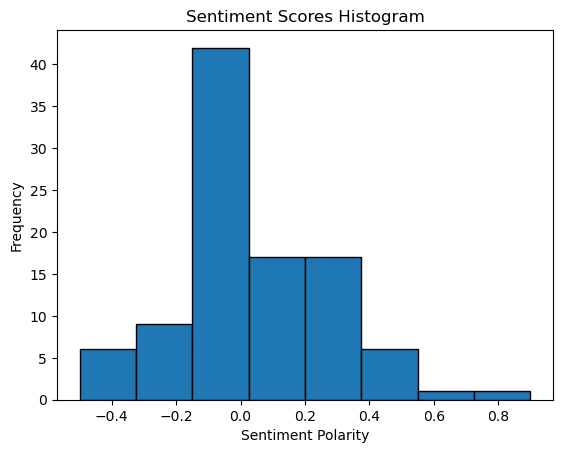

In [41]:
import matplotlib.pyplot as plt

# Create a histogram of the 'Sentiment' column
plt.hist(df['sentiment'], bins=8, edgecolor='black')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.title('Sentiment Scores Histogram')
plt.show()